<a href="https://colab.research.google.com/github/shauryam-daksham/TSF-Task--6-Prediction-Using-Decision-Tree-Classifier/blob/main/TSF_Task_6_Prediction_Using_Decision_Tree_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [64]:
df= pd.read_csv('Iris.csv', index_col=0)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [24]:
''''
from sklearn.preprocessing import OneHotEncoder

dummies=pd.get_dummies(df.Species).astype(int)
df=pd.concat([df,dummies],axis=1)
df.drop('Species', axis=1, inplace=True)
df.head()
''''


,Sepal Length,Sepal Width,Petal Length,Petal Width,Iris-setosa,Iris-versicolor,Iris-virginica
Id,,,,,,,
1,5.1,3.5,1.4,0.2,1,0,0
2,4.9,3.0,1.4,0.2,1,0,0
3,4.7,3.2,1.3,0.2,1,0,0
4,4.6,3.1,1.5,0.2,1,0,0
5,5.0,3.6,1.4,0.2,1,0,0


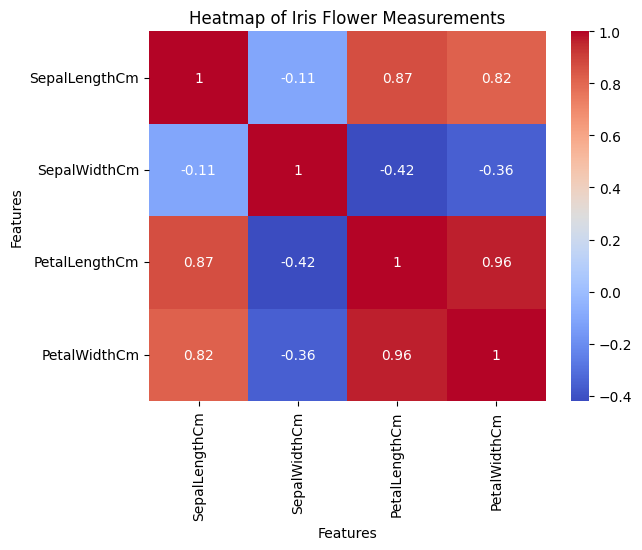

In [56]:
df_filtered = df.drop('Species', axis=1)


sns.heatmap(df_filtered.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Iris Flower Measurements')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics



In [58]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Training Data:",X_train.shape)
print("Testing Data:",X_test.shape)

Training Data: (120, 4)
Testing Data: (30, 4)


In [59]:
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, classification_report


dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [60]:
y_pred=dtc.predict(X_test)


In [61]:
import sklearn.metrics as sm
acc = sm.accuracy_score(y_test,y_pred)
print(acc)

0.9666666666666667


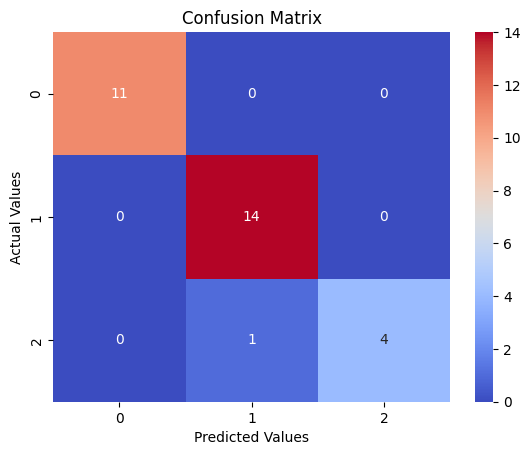

In [62]:
cm=confusion_matrix(y_test,y_pred)
a = sns.heatmap(cm, annot=True, cmap='coolwarm')
a.set_title('Confusion Matrix')
a.set_xlabel('Predicted Values')
a.set_ylabel('Actual Values')
plt.show()

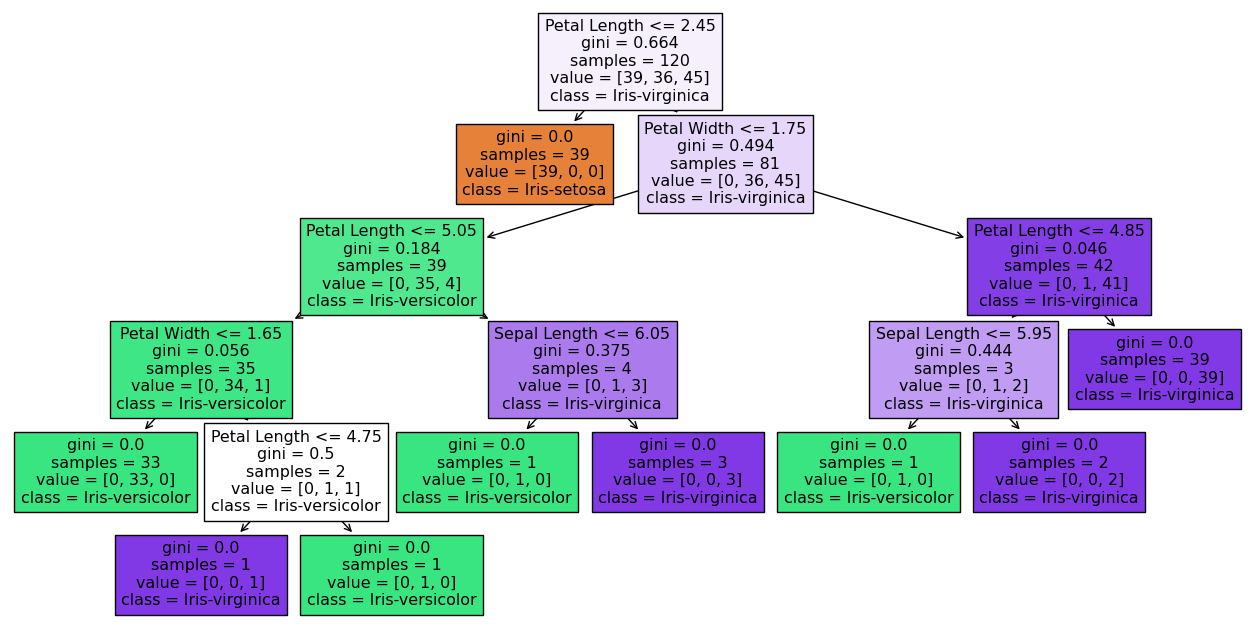

In [63]:
fig = plt.figure(figsize=(16,8))
feature=['Sepal Length','Sepal Width','Petal Length','Petal Width']
class_name =['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
plot_tree(dtc, filled = True,class_names=class_name,feature_names=feature);
plt.show()

In [69]:
Test_point = [[5.4,3.0,4.5,1.5],
             [6.5,2.8,4.6,1.5],
             [4.6,3.1,1.5,0.2	],
             [5.1,3.3,1.7,0.5],
             [6.4,2.5,5.1,1.8	],
             [6.8,2.2,5.0,2.0]]

print(dtc.predict(Test_point))

['Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica']
